# 量子操作の概要

 このセクションでは、量子回路のさまざまな操作について説明します:

- 単一量子ビットゲート
- 複数量子ビットゲート
- 測定
- リセット
- 条件付き操作
- 状態の初期化

## 準備

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

## 単一量子ビットの量子状態 <a name="single_states"/>

単一量子ビットの量子状態は次のように記述できます。

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle , \quad where \quad \alpha, \beta \in \mathbb{C}, \quad　|\alpha|^2+ |\beta|^2 = 1 $$

ベクトルとしては、次のように記述できます。

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

便利な表現としては、以下があります。

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle , \\
\quad where \quad 0\leq \phi < 2\pi, \quad  0\leq \theta \leq \pi $$

通常、量子ゲート操作は行列として表されます。1量子ビットに作用するゲートは、 $2\times 2$ ユニタリー行列 $U$ によって表されます。 量子ゲートの作用は、ゲートを表す行列を量子状態を表すベクトルにかけることで得られます。

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

一般的なユニタリー・ゲートは、以下の形式になります。
$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

## 単一量子ビットゲート <a name="single_gates"/>

利用可能な単一量子ビットゲートは次のとおりです: 
- uゲート : $U$
- 恒等ゲート : $I$
- パウリ・ゲート : $X$, $Y$, $Z$
- 標準的な回転ゲート : $R_x$, $R_y$, $R_z$
- その他有名なゲート : $H$, $S$, $S^{\dagger}$, $T$, $T^{\dagger}$

`unitary_simulator` バックエンドを使用して、それぞれのゲートのユニタリー行列を確認しましょう。

### u ゲート

Qiskit では、 $u3$ ゲートを使用して一般のユニタリー演算を実現できます。

$$
u3(\theta, \phi, \lambda) = u(\theta, \phi, \lambda) =U(\theta, \phi, \lambda) 
$$


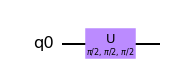

In [2]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
#qc.u3(pi/2,pi/2,pi/2,q) # deprecated
qc.u(pi/2,pi/2,pi/2,q)
qc.draw()

In [3]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

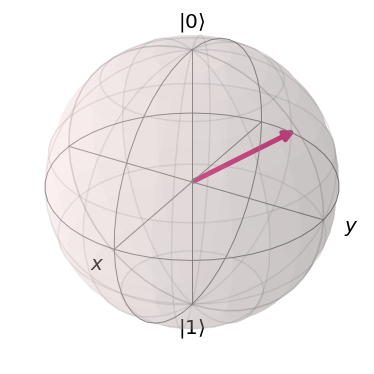

In [4]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([pi/2,pi/2,pi/2])
#plot_bloch_vector([0,0,pi/2])

$u2(\phi, \lambda) =u(\pi/2, \phi, \lambda) $ は次の行列形式を持ちます。重ね合わせを実現します。

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

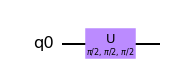

In [5]:
qc = QuantumCircuit(q)
# qc.u2(pi/2,pi/2,q) #deprecated
qc.u(pi/2,pi/2,pi/2,q)
qc.draw()

In [6]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

$u1(\lambda)= u(0, 0, \lambda)$ は次の行列形式を持ちます。位相の変更をします。

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

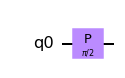

In [7]:
qc = QuantumCircuit(q)
# qc.u1(pi/2,q) # deprecated
qc.p(pi/2,q) # Phase Gate
qc.draw()

In [8]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

### 恒等ゲート

恒等ゲートは、 $I = u1(0)$ です。

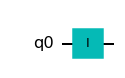

In [9]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw()

In [10]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### パウリゲート

#### $X$ ゲート: ビット反転ゲート
$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u(\pi,0,\pi)
$$

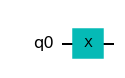

In [11]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw()

In [12]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

#### $Y$ ゲート: ビット及び位相反転ゲート
$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u(\pi,\pi/2,\pi/2)
$$

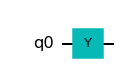

In [13]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw()

In [14]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

#### $Z$ ゲート: 位相反転ゲート
$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

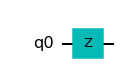

In [15]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw()

In [16]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

### 標準回転

標準回転ゲートは、パウリ $P=\{X,Y,Z\}$ の周りでの回転を定義しているゲートで、次の様に定義されます:

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### X 軸まわりの回転

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u(\theta, -\pi/2,\pi/2)
$$

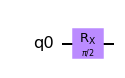

In [17]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw()

In [18]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707-0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707-0.j   ]])

#### Y 軸まわりの回転

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u(\theta,0,0)
$$

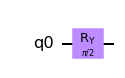

In [19]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw()

In [20]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

#### Z 軸まわりの回転

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi) = u(0, 0, \phi)
$$

グローバル位相 $e^{-i \phi/2}$ だけ u1 と異なるので、同じとみなしています。

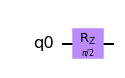

In [21]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw()

In [22]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.707-0.707j, 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

グローバル位相のみ異なることに注意してください。

### その他有名なゲート

#### アダマール・ゲート

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

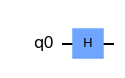

In [23]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw()

In [24]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

#### $S$ (または $\sqrt{Z}$ 位相) ゲート

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

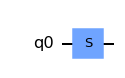

In [25]:
qc = QuantumCircuit(q)
qc.s(q)
qc.draw()

In [26]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

#### $S^{\dagger}$ (または $\sqrt{Z}$ 位相の共役) ゲート

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


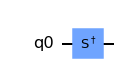

In [27]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw()

In [28]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

#### $T$ (または $\sqrt{S}$ 位相) ゲート

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

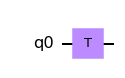

In [29]:
qc = QuantumCircuit(q)
qc.t(q)
qc.draw()

In [30]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

#### $T^{\dagger}$ (または $\sqrt{S}$ 位相の共役) ゲート

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-\pi/4)
$$

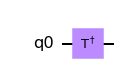

In [31]:
qc = QuantumCircuit(q)
qc.tdg(q)
qc.draw()

In [32]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

## 複数量子ビット・ゲート <a name="multi_gates"/>

### 数学的準備

量子コンピューターの次元は、量子ビットの数に対して指数関数的に大きくなります。$n$ 量子ビットの場合、複素数ベクトル空間は $d=2^n$ 次元になります。複数量子ビット系の状態を表すためには、テンソル積を用いて演算子と基底ベクトルを”結合”します。

2量子ビットシステムから始めてみましょう。それぞれ片方の量子ビットに作用する $A$ と $B$ という2つの演算子を用意し、2つの量子ビットに作用する結合演算子 $A \otimes B$ は、

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

と与えられます。ここで $A_{jk}$ and $B_{lm}$ は $A$ と $B$ それぞれの行列成分になります。

同様に、2量子ビット系の基底ベクトルは、単一量子ビットでの基底ベクトルのテンソル積を使って形成されます:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}$$

ここで、基底ベクトルの略記として $\left|0\right\rangle \otimes \left|0\right\rangle$ は $\left|00\right\rangle$ と記載することにします。

### Qiskitにおける基底ベクトル表記の順番

Qiskit では、量子ビットは最上位ビット (Most Significant Bit - MSB) を左にとり、最下位ビット (Least Significant Bit - LSB) を右にとります。これにより、古典コンピューター上でのビット列表現と同じようになり、測定が実行された後のビット文字列から整数への変換が容易になります。

Qiskitで使用される表現は、基底ベクトルをそれらが表す整数の昇順で列挙します。たとえば、2量子ビット系の基底ベクトルは、 $\left|00\right\rangle$ 、 $\left|01\right\rangle$ 、 $\left|10\right\rangle$ 、および $\left|11\right\rangle$ の順序になります。基底ベクトルをビット文字列と見なし、それぞれを整数の 0、1、2、3 にエンコードします。

### 量子ビットに対する制御操作

複数量子ビット・ゲートに共通なものとして、ある量子ビットの状態に応じて、別の量子ビットのゲートを制御するというものがあります。例えば、最初の 量子ビットが $\left|0\right\rangle$ の時に、2つ目の量子ビットの状態を反転したい場合があります。このようなゲートは *制御ゲート* として知られています。

## 2量子ビット・ゲート <a name="two_gates"/>

多くの2量子ビット・ゲートは制御タイプのものです。SWAP ゲートは例外になります。一般的に、制御 2量子ビット・ゲート $C_{U}$ は　最初の 量子ビットが $\left|1\right\rangle$ の時に、2つ目の量子ビットに対して単一量子ビット・ユニタリー $U$ を適用します。 $U$ が以下の行列表示であるとします。

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

$C_{U}$ の動作は次のように計算できます。2量子ビット系の基底ベクトルは $\left|00\right\rangle 、 \left|01\right\rangle 、 \left|10\right\rangle 、 \left|11\right\rangle$の順序で並べられることを思い出してください。 **制御量子ビット** を **量子ビット 0** であると仮定します(Qiskitの慣例によれば、これはテンソル積の _右側_ のひとつです)。もし制御量子ビットが $\left|1\right\rangle$ であれば、$U$ を **ターゲット** (量子ビット 1、テンソル積の _左側_ のひとつ) に適用する必要があります。従って、$C_{U}$ を作用させた後の基底ベクトルは次の様に変換されます:

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}$$

すなわち、**量子ビット0 が制御で、量子ビット 1 が ターゲット** の行列形式では、 $C_{U}$ の作用は左の様になります。対して、**量子ビット1 が制御で、量子ビット 0 が ターゲット** の場合の $C_{U}$ の行列表示は右の様になります:

$$
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}, \quad
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}
$$

### 制御パウリ・ゲート

#### 制御 X (もしくは、制御NOT) ゲート
制御NOTゲートは、制御量子ビットが $\left|1\right\rangle$ 状態のとき、 ターゲット量子ビットを反転します。もしMSBを制御量子ビットとした時(例: `cx(q[1],q[0])`)、行列は左の通りになります。LSBが制御量子ビットの場合 (例えば、`cx(q[0],q[1])` )、このゲートは右の通りになります。

$$
C_X^{MSB} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}, \quad
C_X^{LSB} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$


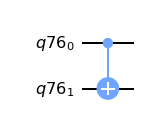

In [33]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw()

In [34]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

#### 制御 $Y$ ゲート

制御量子ビットが MSB の場合あるいはLSBの場合に、ターゲット量子ビットに $Y$ ゲートを適用します。

$$
C_Y^{MSB} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix}, \quad
C_Y^{LSB} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

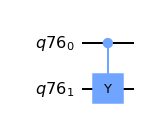

In [35]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])
qc.draw()

In [36]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]])

#### 制御 $Z$ (または、制御位相) ゲート

同様に、制御 $Z$ ゲートは、制御量子ビットが $\left|1\right\rangle$ である場合に、ターゲット量子ビットの位相を反転させます。この行列は、 制御量子ビットがMSBかLSBかに関係なく、同じになります:

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$

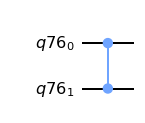

In [37]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw()

In [38]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

### 制御アダマール・ゲート

制御量子ビットが $\left|1\right\rangle$ のとき、ターゲット量子ビットに $H$ ゲートを適用します。制御がLSB量子ビットの時、以下の通りになります。

$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

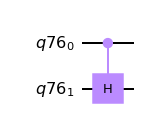

In [39]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])
qc.draw()

In [40]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.   -0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707-0.j,  0.   +0.j,  0.707-0.j],
       [ 0.   +0.j,  0.   +0.j,  1.   -0.j,  0.   +0.j],
       [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]])

### 制御回転ゲート

#### Z軸周りの制御された回転

制御量子ビット(ここではLSB)が $\left|1\right\rangle$ の場合、ターゲット量子ビットでZ軸周りの回転を実行します。

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

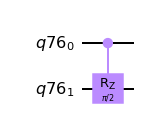

In [41]:
qc = QuantumCircuit(q)
qc.crz(pi/2,q[0],q[1])
#qc.cry(pi/2,q[0],q[1])
#qc.crx(pi/2,q[0],q[1])
qc.draw()

In [42]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]])

### 制御位相回転

制御量子ビットが $\left|1\right\rangle$ の場合、位相の回転を実行します。 行列は、制御量子ビットがMSBかLSBかどうかに関係なく同じになります。

$$
C_{u1}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

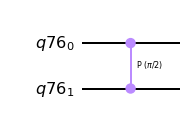

In [43]:
qc = QuantumCircuit(q)
#qc.cu1(pi/2,q[0], q[1]) #deprecated
qc.cp(pi/2,q[0], q[1])
qc.draw()

In [44]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

### 制御 $u3$ 回転

制御量子ビット(ここではLSB)が $\left|1\right\rangle$ のとき、ターゲット量子ビットを $u3$ 回転させます。

$$
C_{u3}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

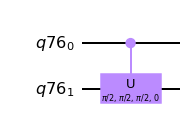

In [45]:
qc = QuantumCircuit(q)
#qc.cu3(pi/2, pi/2, pi/2, q[0], q[1]) #deprecated
qc.cu(pi/2, pi/2, pi/2, 0, q[0], q[1])
qc.draw()

In [46]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.   -0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   , -0.   -0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  1.   -0.j   ,  0.   +0.j   ],
       [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]])

### SWAP ゲート

SWAPゲートは2つの量子ビットを交換します。それは次のように基底ベクトルを変換します。

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

行列表現は以下の通りです。

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

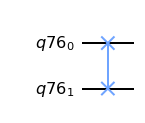

In [47]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])
qc.draw()

In [48]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

## 3量子ビット・ゲート <a name="three_gates"/>

一般に使用されている2つの3量子ビット・ゲートがあります。3量子ビットにおいて、基底ベクトルは以下の順番になります。

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

ビット文字列は、整数 $0,1,2,\cdots, 7$ を表します。繰り返しになりますが、Qiskitは最初の量子ビットがテンソル積の右端にあり、3番目の量子ビットが左端にあるという表現を使用します:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Toffoliゲート( $ccx$ ゲート)

[Toffoliゲート](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) は、最初の2つの量子ビット(LSB)がどちらも $\left|1\right\rangle$ のとき、3番目の量子ビットを反転します:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

トフォリゲートの行列形式は次の通りです:
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

In [49]:
q = QuantumRegister(3)

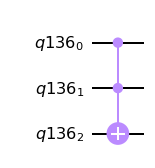

In [50]:
qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw()

In [51]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### 制御SWAPゲート (フレドキン・ゲート)

[フレドキン・ゲート](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate) 、または 制御SWAPゲートは、最初の量子ビット(LSB)が $\left|1\right\rangle$ のとき、2番目と3番目の量子ビットを交換します:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

Fredkinゲートの行列形式は以下の通りになります。

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

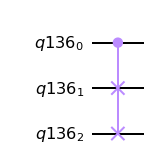

In [52]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw()

In [53]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-0.j]])

## 非ユニタリー操作 <a name="non_unitary"/>

ここまで、量子回路におけるすべてのユニタリー操作について見てきましたが、非ユニタリー操作についても見ていきましょう。これには、測定、量子ビットのリセット、そして古典的条件付き操作が含まれます。

In [54]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

### 測定

我々は測定が行われるまで量子コンピューターにおける全ての情報を知ることはできません。測定により量子状態は、標準基底に射影されます。

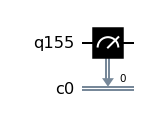

In [55]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw()

In [56]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

シミュレーターは古典レジスタが0を返す確率が100%であることを予測しています。

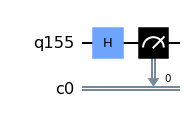

In [57]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw()

In [58]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 521, '0': 503}

シミュレーターは古典レジスタが0もしくは1を返す確率が50%であることを予測しています。

### リセット
リセット演算子は途中で $\left|0\right\rangle$ 状態に `リセット` することができます。 `リセット` は、不可逆操作です。

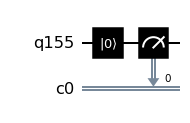

In [59]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

In [60]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

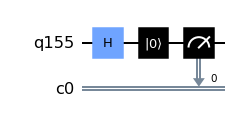

In [61]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

In [62]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

ここで、両方の回路においてシミュレーターは出力が100%の確率で0状態であることを常に予測することが確認できます。

### 条件付き操作
古典レジスタの状態に応じて操作を行うことも可能です。

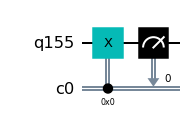

In [63]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

ここでは古典ビットは常に値0をとるので、量子ビットの状態は常に反転されます。

In [64]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 1024}

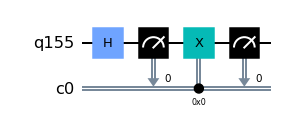

In [65]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

In [66]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 1024}

ここで、最初の測定による古典ビットはランダムですが、条件付きの演算の結果は、量子ビットは必ず $\left|1\right\rangle$ になります。

## 任意の初期化 <a name="initialization"/>
量子ビットのレジスターを任意の状態に初期化したい場合はどうしましょう？ $n$ 量子ビットの任意の状態は、$2^n$ 次の振幅ベクトルで指定できます。ここで、振幅のノルムの2乗の合計は1です。例えば、次の3量子ビットの状態を用意するには以下のようにします：

$$\left|\psi\right\rangle = \frac{i}{4}\left|000\right\rangle + \frac{1}{\sqrt{8}}\left|001\right\rangle + \frac{1+i}{4}\left|010\right\rangle + \frac{1+2i}{\sqrt{8}}\left|101\right\rangle + \frac{1}{4}\left|110\right\rangle$$

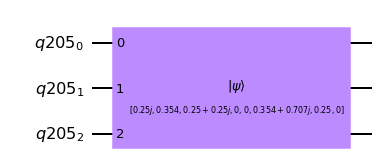

In [67]:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.draw()

In [68]:
from qiskit.visualization import plot_state_city
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
qc_state = job.result().get_statevector(qc)
qc_state 
#plot_state_city(qc_state)

array([2.50000000e-01-8.13548994e-18j, 1.80411242e-16-3.53553391e-01j,
       2.50000000e-01-2.50000000e-01j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 7.07106781e-01-3.53553391e-01j,
       1.00613962e-16-2.50000000e-01j, 0.00000000e+00+0.00000000e+00j])

[Fidelity](https://en.wikipedia.org/wiki/Fidelity_of_quantum_states) (忠実度) は、2つの状態が同じかどうかを確認するのに役立ちます。 （純粋な）量子状態 $\left|\psi_1\right\rangle$ と $\left|\psi_2\right\rangle$ の場合、Fidelity (忠実度) 度は次の様に表されます。

$$
F\left(\left|\psi_1\right\rangle,\left|\psi_2\right\rangle\right) = \left|\left\langle\psi_1\middle|\psi_2\right\rangle\right|^2.
$$

2つの状態が同じ場合に限り、忠実度は 1 に等しくなります。

In [69]:
state_fidelity(desired_vector,qc_state)

1.0000000000000004

### 更に詳細な説明

裏では、どのようにして目的の状態が生成されるのでしょうか。 複数の方法がありますが、 Qiskitは [Shendeらによって提案された方法](https://arxiv.org/abs/quant-ph/0406176) を使っています。 これは、量子レジスタが我々の望む状態から始まったと仮定し、それを $\left|00..0\right\rangle$ の状態にする回路を構築するアイデイアです。 初期化回路はこの回路の逆になります。

任意の量子状態を計算基底のゼロ状態にするために、1つずつレジスターから量子ビットのもつれをほどく反復的な手順を行ないます。任意の1量子ビット状態 $\left|\rho\right\rangle$ は次のようにZ軸まわりの $\phi$ 度回転とY軸まわりの $\theta$ 度回転を用いることで $\left|0\right\rangle$ 状態にすることができます:

$$R_y(-\theta)R_z(-\phi)\left|\rho\right\rangle = re^{it}\left|0\right\rangle$$

ここからは、1量子ビットの代わりに $n$ 量子ビットを扱うので、状態ベクトルを最下位ビット(LSB)方式で分離する必要があります:

$$\begin{align*}
 \left|\psi\right\rangle =& \alpha_{0_0}\left|00..00\right\rangle + \alpha_{0_1}\left|00..01\right\rangle + \alpha_{1_0}\left|00..10\right\rangle + \alpha_{1_1}\left|00..11\right\rangle + ... \\&+ \alpha_{(2^{n-1}-1)_0}\left|11..10\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|11..11\right\rangle \\
=& \left|00..0\right\rangle (\alpha_{0_0}\left|0\right\rangle + \alpha_{0_1}\left|1\right\rangle) + \left|00..1\right\rangle (\alpha_{1_0}\left|0\right\rangle + \alpha_{1_1}\left|1\right\rangle) + ... \\&+ \left|11..1\right\rangle (\alpha_{(2^{n-1}-1)_0}(\left|0\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|1\right\rangle) \\
=& \left|00..0\right\rangle\left|\rho_0\right\rangle + \left|00..1\right\rangle\left|\rho_1\right\rangle + ... + \left|11..1\right\rangle\left|\rho_{2^{n-1}-1}\right\rangle
\end{align*}$$

ここで、それぞれの1量子ビット状態 $\left|\rho_0\right\rangle, ..., \left|\rho_{2^{n-1}-1}\right\rangle$ は、 上の式に従って適切な角度 $\phi$ と $\theta$ を見つけることで $\left|0\right\rangle$ に取れます。 すべての状態でこれを同時に行うユニタリー行列はLSB方式で次のようになります：

$$U = \begin{pmatrix} 
R_{y}(-\theta_0)R_{z}(-\phi_0) & & & &\\  
& R_{y}(-\theta_1)R_{z}(-\phi_1) & & &\\
& . & & &\\
& & . & &\\
& & & & R_y(-\theta_{2^{n-1}-1})R_z(-\phi_{2^{n-1}-1})
\end{pmatrix} $$

すなわち、以下の通りです。

$$U\left|\psi\right\rangle = \begin{pmatrix} r_0e^{it_0}\\ r_1e^{it_1}\\ . \\ . \\ r_{2^{n-1}-1}e^{it_{2^{n-1}-1}} \end{pmatrix}\otimes\left|0\right\rangle$$

これはブロック対角行列なので、Uは「量子マルチプレクサー」ゲートとして実装できます。量子マルチプレクサーのフォーマリズムでは $2^s$ 個のブロックから成る $2^n \times 2^n$ のブロック対角行列は、$s$ 個の選択制御量子ビットと $n-s$ 個のデータ量子ビットをもつマルチプレクサーと等価です。選択制御量子ビットの状態に依って、対応するブロックがデータ量子ビットに適用されます。この種のマルチプレクサーはcx、rz、ryといった基本ゲートへ再帰的に分解することで実装することができます。

In [70]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright